# 0. Content

    1. Import Library & Data
    2. Data Cleaning & Prepping
    3. Visual Exploration
    4. Running Regression
    5. Discussion
    6. Additional Analysis on Education Completion with Happiness Rank
    7. Additional: How much of GDP is correlated to Happines Rank

# 1. Import Library & Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Education Completion Analysis'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','State_of_Education.csv'))

In [4]:
df.head()

,Country,Indicator,Gender,Education_Level,Wealth_Quintile,Residence,Data_Year,Percentage,Data_Source,Happiness_Rank,Country_Code,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,Primary,Total,Total,2015,40.200001,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,Primary,Total,Total,2015,67.199997,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,Upper Secondary,Not Available,Not Available,2015,14.365360,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,Upper Secondary,Not Available,Not Available,2015,32.315559,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
4,Afghanistan,Completion rate for adolescents of lower secon...,Female,Lower Secondary,Not Available,Not Available,2015,25.631340,DHS 2015,146.0,AFG,368.754614,South Asia,Low income


# 2. Data Cleaning & Prepping

In [5]:
# Using necessary columns
df = df[['Country','Indicator','Gender','Percentage','Happiness_Rank','GDP_PerCapita','Income_Group']]

In [6]:
df.head()

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614,Low income
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614,Low income
4,Afghanistan,Completion rate for adolescents of lower secon...,Female,25.631340,146.0,368.754614,Low income


In [7]:
# Creating subset for primary level completion rates 
df_prim_comp = df[df['Indicator']=='Completion rate for children of primary school age']
df_prim_comp

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614,Low income
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757,Lower middle income
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757,Lower middle income
14,Albania,Completion rate for children of primary school...,Female,95.698372,90.0,6492.872012,Upper middle income
...,...,...,...,...,...,...,...
1089,Zambia,Completion rate for children of primary school...,Male,70.944771,137.0,1137.343633,Low income
1096,Zimbabwe,Completion rate for children of primary school...,Female,91.599998,144.0,1773.920411,Lower middle income
1097,Zimbabwe,Completion rate for children of primary school...,Male,86.400002,144.0,1773.920411,Lower middle income
1106,Kosovo,Completion rate for children of primary school...,Female,98.800000,32.0,5269.783901,Upper middle income


In [8]:
#Check for missing values
df_prim_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    40
GDP_PerCapita      8
Income_Group       0
dtype: int64

In [9]:
df_GDPnan = df_prim_comp[df_prim_comp['GDP_PerCapita'].isnull()==True]
df_GDPnan

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
268,Cuba,Completion rate for children of primary school...,Female,99.840607,NaN,NaN,Upper middle income
269,Cuba,Completion rate for children of primary school...,Male,99.500000,NaN,NaN,Upper middle income
758,Democratic People's Republic of Korea,Completion rate for children of primary school...,Female,100.000000,59.0,NaN,Low income
759,Democratic People's Republic of Korea,Completion rate for children of primary school...,Male,100.000000,59.0,NaN,Low income
944,Turkmenistan,Completion rate for children of primary school...,Female,100.000000,78.0,NaN,Upper middle income
945,Turkmenistan,Completion rate for children of primary school...,Male,100.000000,78.0,NaN,Upper middle income
1064,Yemen,Completion rate for children of primary school...,Female,54.799999,132.0,NaN,Low income
1065,Yemen,Completion rate for children of primary school...,Male,70.300003,132.0,NaN,Low income


4 countries missing GDP PerCapita. Propose to drop these countries since the regression can't run with NaN values.

In [10]:
# Dropping countries with Nan GDP values
df_prim_comp = df_prim_comp[~df_prim_comp['GDP_PerCapita'].isnull()==True]
df_prim_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    38
GDP_PerCapita      0
Income_Group       0
dtype: int64

In [11]:
# Creating subset data for Primary level Completion rate for Male & Female
df_prim_comp_M = df_prim_comp.loc[df['Gender']=='Male']
df_prim_comp_F = df_prim_comp.loc[df['Gender']=='Female']

<AxesSubplot:xlabel='GDP_PerCapita', ylabel='Count'>

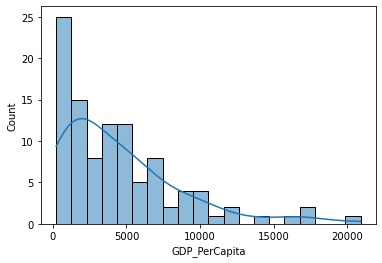

In [12]:
# Check for extreme value
sns.histplot(df_prim_comp_M['GDP_PerCapita'], bins = 20, kde = True)

In [13]:
# Check for stats
df_prim_comp_M['GDP_PerCapita'].mean()

4564.640449204855

In [14]:
df_prim_comp_M['GDP_PerCapita'].median()

3690.627878

In [15]:
df_prim_comp_M['GDP_PerCapita'].max()

20908.5827

<AxesSubplot:xlabel='GDP_PerCapita', ylabel='Count'>

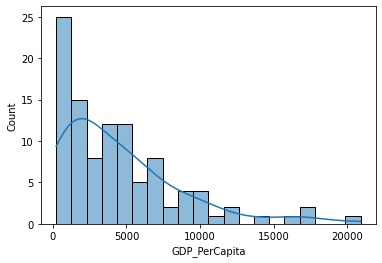

In [16]:
# Check for extreme value
sns.histplot(df_prim_comp_F['GDP_PerCapita'], bins = 20, kde = True)

In [17]:
# Check for stats
df_prim_comp_F['GDP_PerCapita'].mean()

4564.640449204855

In [18]:
df_prim_comp_F['GDP_PerCapita'].median()

3690.627878

In [19]:
# Creating subset for upper secondary level completion rates 
df_upsec_comp = df[df['Indicator']=='Completion rate for youth of upper secondary education school age']
df_upsec_comp

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614,Low income
10,Angola,Completion rate for youth of upper secondary e...,Female,15.210190,NaN,1953.533757,Lower middle income
11,Angola,Completion rate for youth of upper secondary e...,Male,23.698139,NaN,1953.533757,Lower middle income
16,Albania,Completion rate for youth of upper secondary e...,Female,79.857063,90.0,6492.872012,Upper middle income
...,...,...,...,...,...,...,...
1091,Zambia,Completion rate for youth of upper secondary e...,Male,33.276039,137.0,1137.343633,Low income
1098,Zimbabwe,Completion rate for youth of upper secondary e...,Female,13.600000,144.0,1773.920411,Lower middle income
1099,Zimbabwe,Completion rate for youth of upper secondary e...,Male,17.200001,144.0,1773.920411,Lower middle income
1108,Kosovo,Completion rate for youth of upper secondary e...,Female,86.600000,32.0,5269.783901,Upper middle income


In [20]:
#Check for missing values
df_upsec_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    40
GDP_PerCapita      8
Income_Group       0
dtype: int64

In [21]:
df_GDPnan2 = df_upsec_comp[df_upsec_comp['GDP_PerCapita'].isnull()==True]
df_GDPnan2

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
270,Cuba,Completion rate for youth of upper secondary e...,Female,63.468102,NaN,NaN,Upper middle income
271,Cuba,Completion rate for youth of upper secondary e...,Male,54.493649,NaN,NaN,Upper middle income
760,Democratic People's Republic of Korea,Completion rate for youth of upper secondary e...,Female,100.000000,59.0,NaN,Low income
761,Democratic People's Republic of Korea,Completion rate for youth of upper secondary e...,Male,99.699997,59.0,NaN,Low income
946,Turkmenistan,Completion rate for youth of upper secondary e...,Female,97.224037,78.0,NaN,Upper middle income
947,Turkmenistan,Completion rate for youth of upper secondary e...,Male,96.631203,78.0,NaN,Upper middle income
1066,Yemen,Completion rate for youth of upper secondary e...,Female,23.400000,132.0,NaN,Low income
1067,Yemen,Completion rate for youth of upper secondary e...,Male,36.799999,132.0,NaN,Low income


In [22]:
# Same as above. Dropping countries with Nan GDP values
df_upsec_comp = df_upsec_comp[~df_upsec_comp['GDP_PerCapita'].isnull()==True]
df_upsec_comp.isnull().sum() # recheck

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    38
GDP_PerCapita      0
Income_Group       0
dtype: int64

In [23]:
# Creating subset data for uppersecondary level Completion rate for Male & Female
df_upsec_comp_M = df_upsec_comp.loc[df['Gender']=='Male']
df_upsec_comp_F = df_upsec_comp.loc[df['Gender']=='Female']

<AxesSubplot:xlabel='GDP_PerCapita', ylabel='Count'>

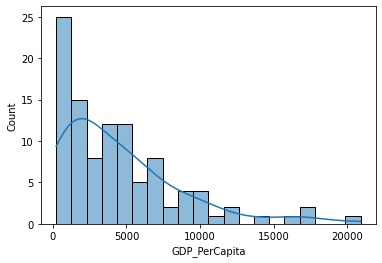

In [24]:
# Check for extreme value
sns.histplot(df_upsec_comp_M['GDP_PerCapita'], bins = 20, kde = True)

In [25]:
# Check for stats uppersecondary completion rate
df_upsec_comp_M['GDP_PerCapita'].mean()

4564.640449204855

In [26]:
df_upsec_comp_M['GDP_PerCapita'].median()

3690.627878

# 3. Visual exploration

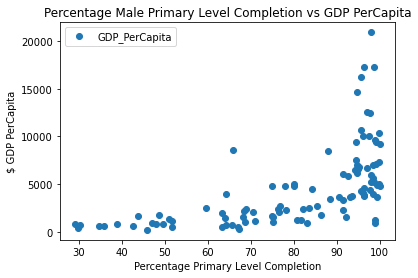

In [27]:
# Create a scatterplot using matplotlib to see visual relationship for Primary Level Male

df_prim_comp_M.plot(x = 'Percentage', y='GDP_PerCapita', style='o') # o for scatterplot.
plt.title('Percentage Male Primary Level Completion vs GDP PerCapita')  
plt.xlabel('Percentage Primary Level Completion')  
plt.ylabel('$ GDP PerCapita')  
plt.show()

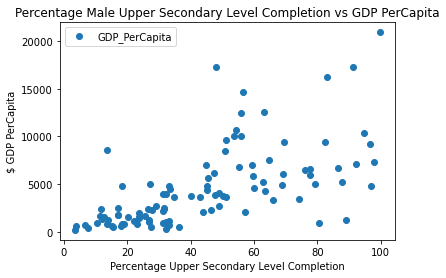

In [28]:
# Create a scatterplot using matplotlib to see visual relationship for UpperSecondary Level Male

df_upsec_comp_M.plot(x = 'Percentage', y='GDP_PerCapita', style='o') # o for scatterplot.
plt.title('Percentage Male Upper Secondary Level Completion vs GDP PerCapita')  
plt.xlabel('Percentage Upper Secondary Level Completion')  
plt.ylabel('$ GDP PerCapita')  
plt.show()

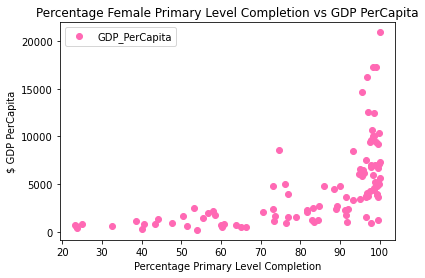

In [29]:
# Create a scatterplot using matplotlib to see visual relationship for Primary Level Female

df_prim_comp_F.plot(x = 'Percentage', y='GDP_PerCapita', style='o',color = 'hotpink') # o for scatterplot.
plt.title('Percentage Female Primary Level Completion vs GDP PerCapita')  
plt.xlabel('Percentage Primary Level Completion')  
plt.ylabel('$ GDP PerCapita')  
plt.show()

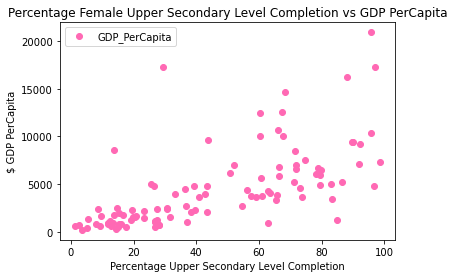

In [30]:
# Create a scatterplot using matplotlib to see visual relationship for Upper Secondary Level Female

df_upsec_comp_F.plot(x = 'Percentage', y='GDP_PerCapita', style='o',color = 'hotpink') # o for scatterplot.
plt.title('Percentage Female Upper Secondary Level Completion vs GDP PerCapita')  
plt.xlabel('Percentage Upper Secondary Level Completion')  
plt.ylabel('$ GDP PerCapita')  
plt.show()

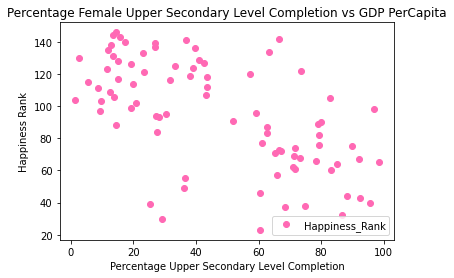

In [31]:
# Create a scatterplot using matplotlib to see visual relationship for Upper Secondary Level Female

df_upsec_comp_F.plot(x = 'Percentage', y='Happiness_Rank', style='o',color = 'hotpink') # o for scatterplot.
plt.title('Percentage Female Upper Secondary Level Completion vs GDP PerCapita')  
plt.xlabel('Percentage Upper Secondary Level Completion')  
plt.ylabel('Happiness Rank')  
plt.show()

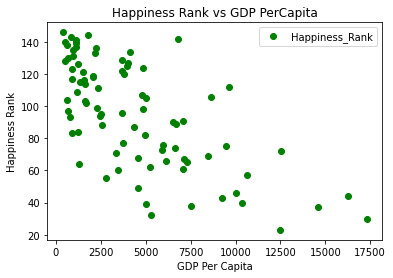

In [32]:
# Create a scatterplot using matplotlib to see visual relationship for GDP Per Capita and Happiness Rank

df_upsec_comp_M.plot(x = 'GDP_PerCapita', y='Happiness_Rank', style='o',color = 'green') # o for scatterplot.
plt.title('Happiness Rank vs GDP PerCapita')  
plt.xlabel('GDP Per Capita')  
plt.ylabel('Happiness Rank')  
plt.show()

Hypothesis:
1. Completion of Upper Secondary level has more correlation on the GDP compared to Primary level completion
2. Completion of Female Upper Secondary level correlates more to the GDP compared to male

# 4. Running Regression

In [33]:
# Reshaping the variables into NumPy arrays
X = df_prim_comp_M['Percentage'].values.reshape(-1,1)
y = df_prim_comp_M['GDP_PerCapita'].values.reshape(-1,1)

In [34]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# Create a regression object.
reg_prim_comp_M = LinearRegression() 

In [36]:
# Fitting regression into training set
reg_prim_comp_M.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X on the test set
y_predicted = reg_prim_comp_M.predict(X_test)

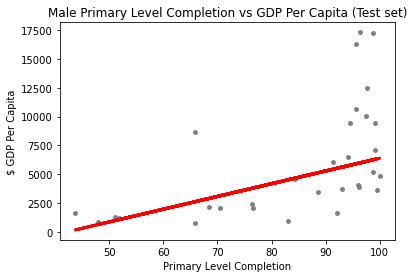

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Male Primary Level Completion vs GDP Per Capita (Test set)')
plot_test.xlabel('Primary Level Completion')
plot_test.ylabel('$ GDP Per Capita')
plot_test.show()

In [39]:
# Calculating summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [40]:
# Print the model summary statistics. 
print('Slope:' ,reg_prim_comp_M.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[110.39518125]]
Mean squared error:  18064760.103540972
R2 score:  0.22357194953071402


In [41]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3690.627878,5623.997571
1,9465.703999,5783.523687
2,6492.872012,5743.399785
3,9414.226231,6300.237164
4,3460.530963,5123.529407
5,1636.893209,173.079730
6,16265.095980,5912.556114
7,2065.749068,3131.895793
8,10045.680500,6112.565687
9,1606.462514,5520.366524


##### Comparing with upper secondary

In [42]:
# Reshaping the variables into NumPy arrays
X = df_upsec_comp_M['Percentage'].values.reshape(-1,1)
y = df_upsec_comp_M['GDP_PerCapita'].values.reshape(-1,1)

In [43]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Create a regression object.
reg_upsec_comp_M = LinearRegression() 

In [45]:
# Fitting regression into training set
reg_upsec_comp_M.fit(X_train, y_train)

LinearRegression()

In [46]:
# Predict the values of y using X.
y_predicted = reg_upsec_comp_M.predict(X_test)

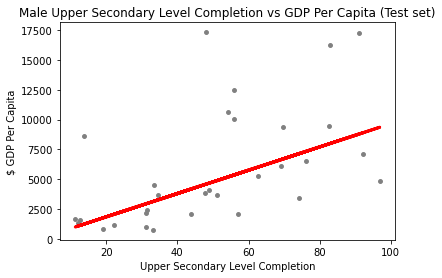

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Male Upper Secondary Level Completion vs GDP Per Capita (Test set)')
plot_test.xlabel('Upper Secondary Level Completion')
plot_test.ylabel('$ GDP Per Capita')
plot_test.show()

In [48]:
# Calculating summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [49]:
# Print the model summary statistics. 
print('Slope:' ,reg_upsec_comp_M.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[97.53474554]]
Mean squared error:  17424472.082710877
R2 score:  0.25109169387841224


In [50]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3690.627878,3277.582121
1,9465.703999,7950.145819
2,6492.872012,7334.658659
3,9414.226231,6688.314530
4,3460.530963,7131.385131
5,1636.893209,998.991099
6,16265.095980,8001.981245
7,2065.749068,5459.376931
8,10045.680500,5352.088906
9,1606.462514,1135.926956


Comparing the correlation between Male Primary and Upper Secondary level with the GDP, both of these have very low correlation with the GDP due to the many 'outliers'. However, the r2 score for the upper Secondary level is slightly higher than the primary level, hence moving forward, we will use this to compare against the female upper secondary completion rate later on.

##### Comparing the upper secondary Male completion with the training set. Checking the model

In [51]:
# Predict on training set
y_predicted_train = reg_upsec_comp_M.predict(X_train) 

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,reg_upsec_comp_M.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[97.53474554]]
Mean squared error:  7711990.31313427
R2 score:  0.44430094991177094


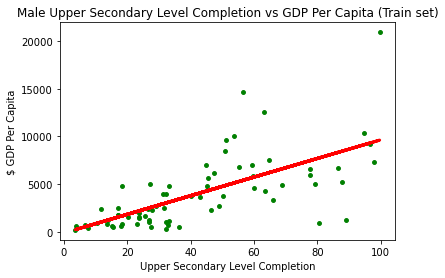

In [54]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Male Upper Secondary Level Completion vs GDP Per Capita (Train set)')
plot_test.xlabel('Upper Secondary Level Completion')
plot_test.ylabel('$ GDP Per Capita')
plot_test.show()

The results on this training set shows a better r2 score (0.25 test vs 0.44 train), which means our model may slightly be overfitting. But in any ways, the correlation is still very low.

##### Running Regression on Female Upper secondary completion rate

In [55]:
# Reshaping the variables into NumPy arrays
X = df_upsec_comp_F['Percentage'].values.reshape(-1,1)
y = df_upsec_comp_F['GDP_PerCapita'].values.reshape(-1,1)

In [56]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# Create a regression object
reg_upsec_comp_F = LinearRegression() 

In [58]:
# Fitting regression into training set. This i where you train the model
reg_upsec_comp_F.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_upsec_comp_F.predict(X_test)

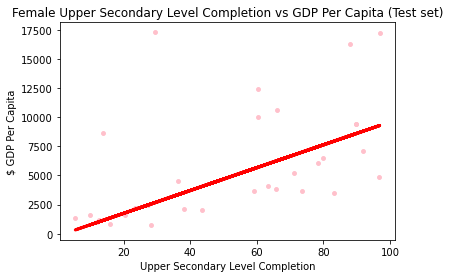

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Female Upper Secondary Level Completion vs GDP Per Capita (Test set)')
plot_test.xlabel('Upper Secondary Level Completion')
plot_test.ylabel('$ GDP Per Capita')
plot_test.show()

In [61]:
# Print the model summary statistics. 
print('Slope:' ,reg_upsec_comp_F.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[98.11816239]]
Mean squared error:  7711990.31313427
R2 score:  0.44430094991177094


In [62]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,3690.627878,5593.102125
1,9465.703999,8610.451871
2,6492.872012,7623.423091
3,9414.226231,8589.193688
4,3460.530963,7957.694991
5,1636.893209,743.625931
6,16265.095980,8430.280924
7,2065.749068,4056.134880
8,10045.680500,5714.332021
9,1606.462514,1785.355733


The r2 score for Female at upper secondary is higher(0.44) compared to male upper secondary (0.25). This means that the female has a slightly stronger correlation to the GDP than the male, although r2 score of 0.44 is still weak.

##### Testing the model on the training data itself to check for model's performance

In [63]:
# Predict on training set
y_predicted_train = reg_upsec_comp_F.predict(X_train) 

In [64]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [65]:
print('Slope:' ,reg_upsec_comp_M.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[97.53474554]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


R2 score is only slightly better on the training set. We will not remove any outliers because these are actual country data and many other untested factors contribute to its point on the plot.

#### Running Regression on Female Primary Completion

In [66]:
# Reshaping the variables into NumPy arrays
X = df_prim_comp_F['Percentage'].values.reshape(-1,1)
y = df_prim_comp_F['GDP_PerCapita'].values.reshape(-1,1)

In [67]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# Create a regression object
reg_prim_comp_F = LinearRegression() 

In [69]:
# Fitting regression into training set. This i where you train the model
reg_prim_comp_F.fit(X_train, y_train)

LinearRegression()

In [70]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_prim_comp_F.predict(X_test)

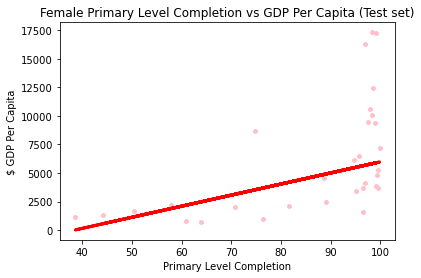

In [71]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Female Primary Level Completion vs GDP Per Capita (Test set)')
plot_test.xlabel('Primary Level Completion')
plot_test.ylabel('$ GDP Per Capita')
plot_test.show()

In [72]:
print('Slope:' ,reg_prim_comp_F.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[96.93467172]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


The correlation with GDP for primary level female completion is even higher than female upper secondary completion

# 5. Discussion

Referring back to the hypothesis outlined earlier in the document:
1. Completion of Upper Secondary level has more correlation on the GDP compared to Primary level completion
2. Completion of Female Upper Secondary level correlates more to the GDP compared to male

Some of the analysis run above gave some insights to thise hypothesis.
1. For males, upper secondary level has a slightly higher correlation to the GDP compared to primary level (r2 = 0.22 vs 0.25)
2. At Upper secondary level, the completion rate for female has a higher r2 score compared to male (0.44 vs 0.25)
In both of these cases, the correlation is still very weak. Education completion may be a small factor contributing to GDP_PerCapita

## 6. Additional Check on Education Completion & Happiness Level

In [73]:
#Check for missing values
df_upsec_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    38
GDP_PerCapita      0
Income_Group       0
dtype: int64

In [74]:
df_HapNan = df_upsec_comp[df_upsec_comp['Happiness_Rank'].isnull()==True]
df_HapNan

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
10,Angola,Completion rate for youth of upper secondary e...,Female,15.210190,NaN,1953.533757,Lower middle income
11,Angola,Completion rate for youth of upper secondary e...,Male,23.698139,NaN,1953.533757,Lower middle income
50,Burundi,Completion rate for youth of upper secondary e...,Female,3.400000,NaN,221.477676,Low income
51,Burundi,Completion rate for youth of upper secondary e...,Male,3.600000,NaN,221.477676,Low income
108,Belize,Completion rate for youth of upper secondary e...,Female,50.700001,NaN,6228.267309,Upper middle income
109,Belize,Completion rate for youth of upper secondary e...,Male,47.500000,NaN,6228.267309,Upper middle income
144,Barbados,Completion rate for youth of upper secondary e...,Female,96.900002,NaN,17225.462300,High income
145,Barbados,Completion rate for youth of upper secondary e...,Male,91.199997,NaN,17225.462300,High income
168,Central African Republic,Completion rate for youth of upper secondary e...,Female,5.165232,NaN,461.137490,Low income
169,Central African Republic,Completion rate for youth of upper secondary e...,Male,7.547066,NaN,461.137490,Low income


In [75]:
# Dropping the countries with Nan values in Happiness Rank
df_upsec_comp = df_upsec_comp[~df_upsec_comp['Happiness_Rank'].isnull()==True]
df_upsec_comp.isnull().sum()

Country           0
Indicator         0
Gender            0
Percentage        0
Happiness_Rank    0
GDP_PerCapita     0
Income_Group      0
dtype: int64

In [76]:
# Creating subset data for Primary level Completion rate for Male & Female
df_upsec_comp_M = df_upsec_comp.loc[df['Gender']=='Male']
df_upsec_comp_F = df_upsec_comp.loc[df['Gender']=='Female']

In [77]:
# Reshaping the variables into NumPy arrays
X = df_upsec_comp_F['Percentage'].values.reshape(-1,1)
y = df_upsec_comp_F['Happiness_Rank'].values.reshape(-1,1)

In [78]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
# Create a regression object
reg_upsec_comp_F = LinearRegression() 

In [80]:
# Fitting regression into training set. This i where you train the model
reg_upsec_comp_F.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_upsec_comp_F.predict(X_test)

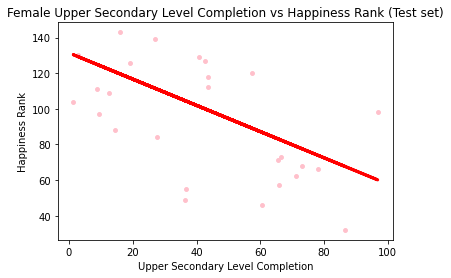

In [82]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Female Upper Secondary Level Completion vs Happiness Rank (Test set)')
plot_test.xlabel('Upper Secondary Level Completion')
plot_test.ylabel('Happiness Rank')
plot_test.show()

In [83]:
# Print the model summary statistics. 
print('Slope:' ,reg_upsec_comp_F.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.73674071]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


The female completion rate at secondary level has a higher correlation to the happiness rank than the GDP.

#### Testing Female Primary completion rate and happiness rank

In [84]:
# Checking Nan values in Happiness rank primary level
df_HapNan2 = df_prim_comp[df_prim_comp['Happiness_Rank'].isnull()==True]
df_HapNan2

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Income_Group
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757,Lower middle income
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757,Lower middle income
48,Burundi,Completion rate for children of primary school...,Female,54.099998,NaN,221.477676,Low income
49,Burundi,Completion rate for children of primary school...,Male,46.000000,NaN,221.477676,Low income
106,Belize,Completion rate for children of primary school...,Female,96.000000,NaN,6228.267309,Upper middle income
107,Belize,Completion rate for children of primary school...,Male,94.800003,NaN,6228.267309,Upper middle income
142,Barbados,Completion rate for children of primary school...,Female,99.199997,NaN,17225.462300,High income
143,Barbados,Completion rate for children of primary school...,Male,98.699997,NaN,17225.462300,High income
166,Central African Republic,Completion rate for children of primary school...,Female,23.639120,NaN,461.137490,Low income
167,Central African Republic,Completion rate for children of primary school...,Male,29.803450,NaN,461.137490,Low income


In [85]:
df_prim_comp = df_prim_comp[~df_prim_comp['Happiness_Rank'].isnull()==True]
df_prim_comp.isnull().sum()

Country           0
Indicator         0
Gender            0
Percentage        0
Happiness_Rank    0
GDP_PerCapita     0
Income_Group      0
dtype: int64

In [86]:
# Creating subset data for Primary level Completion rate for Female
df_prim_comp_F = df_prim_comp.loc[df['Gender']=='Female']

In [87]:
# Reshaping the variables into NumPy arrays
X = df_prim_comp_F['Percentage'].values.reshape(-1,1)
y = df_prim_comp_F['Happiness_Rank'].values.reshape(-1,1)

In [88]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
# Create a regression object
reg_prim_comp_F = LinearRegression() 

In [90]:
# Fitting regression into training set. This i where you train the model
reg_prim_comp_F.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_prim_comp_F.predict(X_test)

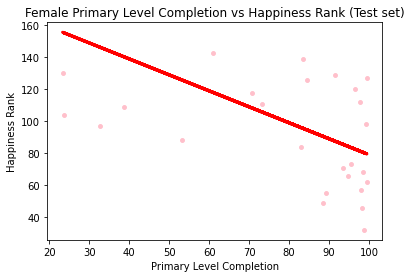

In [92]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='pink', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Female Primary Level Completion vs Happiness Rank (Test set)')
plot_test.xlabel('Primary Level Completion')
plot_test.ylabel('Happiness Rank')
plot_test.show()

In [93]:
# Print the model summary statistics. 
print('Slope:' ,reg_prim_comp_F.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.99996316]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


Same correlation with Happiness for female at primary and upper secondary level.

#### Testing Male uppersec completion with happiness

In [94]:
# Reshaping the variables into NumPy arrays
X = df_upsec_comp_M['Percentage'].values.reshape(-1,1)
y = df_upsec_comp_M['Happiness_Rank'].values.reshape(-1,1)

In [95]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
# Create a regression object
reg_upsec_comp_M = LinearRegression() 

In [97]:
# Fitting regression into training set. This is where you train the model
reg_upsec_comp_M.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_upsec_comp_M.predict(X_test)

In [99]:
# Print the model summary statistics. 
print('Slope:' ,reg_upsec_comp_M.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.83092737]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


Male and female upper secondary completion rates have the same correlation to happiness

### 7. Additional: How much of GDP is correlated to Happiness?

In [101]:
# Reshaping the variables into NumPy arrays
X = df_upsec_comp_F['GDP_PerCapita'].values.reshape(-1,1)
y = df_upsec_comp_F['Happiness_Rank'].values.reshape(-1,1)

In [102]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
# Create a regression object
reg_upsec_comp_F = LinearRegression() 

In [104]:
# Fitting regression into training set. This i where you train the model
reg_upsec_comp_F.fit(X_train, y_train)

LinearRegression()

In [105]:
# Predict the values of y using X. This will be compared against the actual Y in Y test.
y_predicted = reg_upsec_comp_F.predict(X_test)

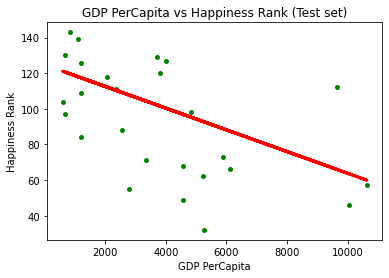

In [106]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP PerCapita vs Happiness Rank (Test set)')
plot_test.xlabel('GDP PerCapita')
plot_test.ylabel('Happiness Rank')
plot_test.show()

In [107]:
# Print the model summary statistics. 
print('Slope:' ,reg_upsec_comp_F.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0060946]]
Mean squared error:  6665966.339487004
R2 score:  0.519673779093796


Still not a strong correlation